## Training Image Animation

This notebook was created in order to implement the animation of the generated images during training.

## Library imports

In [8]:
 import sys
from pathlib import Path

# Add src folder in order to load generator class
src_path = str(Path.cwd().parents[0] / "src")

if src_path not in sys.path:
    sys.path.append(src_path)

In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from torchvision import utils as vutils
from skimage.color import rgb2gray

from dcgan_models import Generator

## Load trained Generator

In [11]:
GENERATOR_PATH = '../models/06-02-21-161819_100_epochs.pt'

device = torch.device(
    "cuda:0" if torch.cuda.is_available() else "cpu"
)
g_model = Generator()
g_model.load_state_dict(torch.load(GENERATOR_PATH))
g_model.to(device)

Generator(
  (stem): Sequential(
    (0): Linear(in_features=100, out_features=18432, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): View()
    (3): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (learner): Sequential(
    (0): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2))
    (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2))
    (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2))
    (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(32, eps=1e-0

## Figure Animation

### Generate images

In [29]:
N_IMAGES = 100
LATENT_DIM = 100
BATCH_SIZE = 64
image_list = list()



for _ in range(N_IMAGES):
    noise = torch.randn(
        BATCH_SIZE,
        LATENT_DIM,
        device=device
    ) # During Training this noise will be fixed
    
    with torch.no_grad():
        generated_images = g_model(noise).detach().cpu()
    image_grid = vutils.make_grid(generated_images,padding=0,normalize=True)
    image_grid = np.transpose(image_grid,(1,2,0)) # Channel First to channel last
    image_list.append(image_grid)

### Animate images

The animated image will be saved into a gif file. 

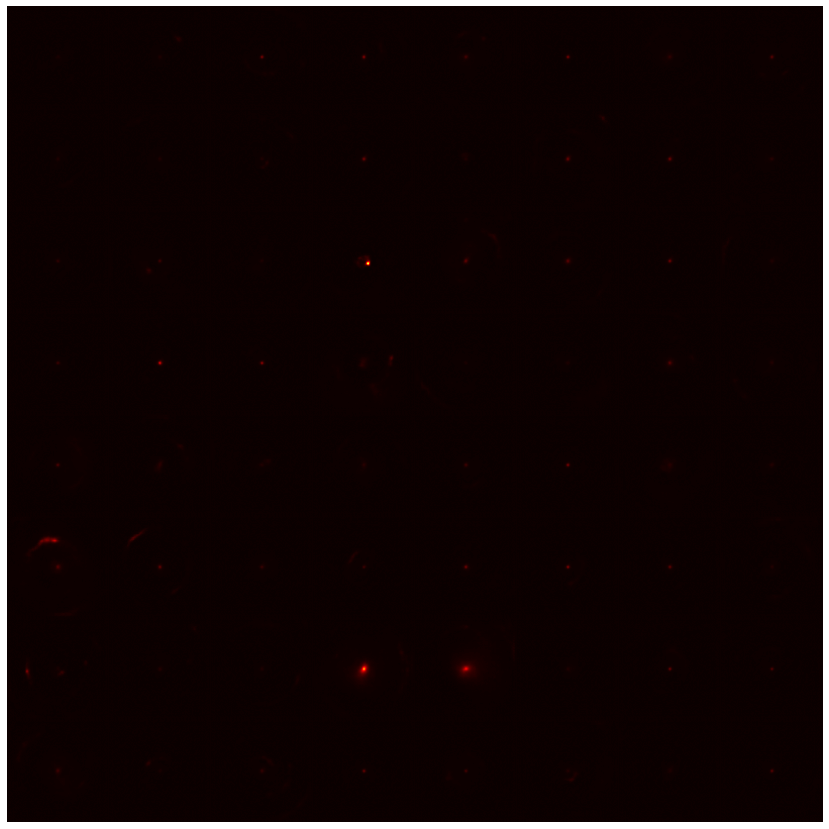

In [36]:
base_figure = plt.figure(figsize=(15,15))
plt.axis('off')
ims = [[plt.imshow(rgb2gray(image),cmap='hot')] for image in image_list]
figure_animation = animation.ArtistAnimation(base_figure,ims,interval=5000, repeat_delay=10000, blit=True)
figure_animation.save('test.gif',animation.PillowWriter())